## Basic Plotting

The baisc package for most graphics in Python is [matplotlib](http://matplotlib.org), and the [seaborn] (http://stanford.edu/~mwaskom/software/seaborn/) package builds on this to provide more statistical graphing options. We will focus on these two packages, but there are many others if these don’t meet your needs.

There are also several specialized packages that might come in useful: ggplot,vispy,lightning,bokeh

* [matplotlib tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
* [matplotlib gallery](http://matplotlib.org/1.2.1/gallery.html)
* [seaborn gallery](http://seaborn.pydata.org/examples/index.html#example-gallery)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Take a peek of different plots

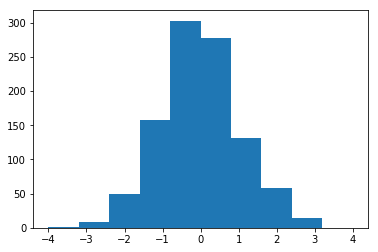

In [2]:
plt.hist(np.random.randn(1000), bins=np.linspace(-4,4,11))
pass

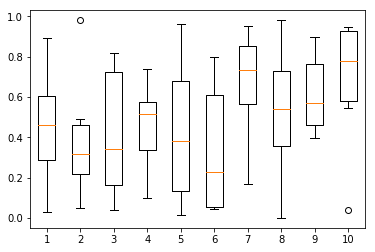

In [3]:
plt.boxplot(np.random.random((6,10)))
pass

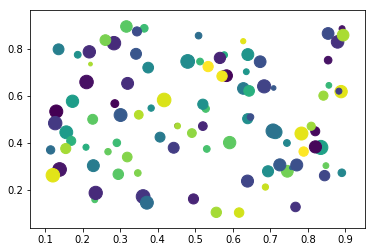

In [4]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100),
            c=np.random.random(100))
pass

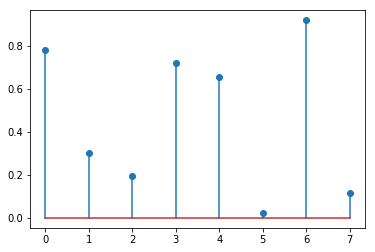

In [5]:
plt.stem(np.random.random(8))
plt.margins(0.05)
pass

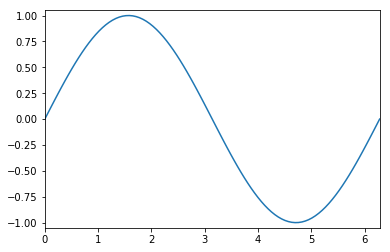

In [6]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
pass

### Colors

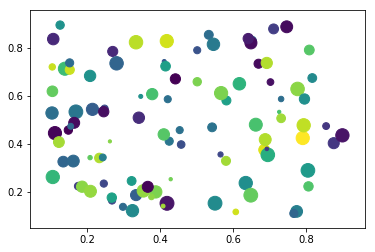

In [7]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100),
            c=np.random.random(100))
pass

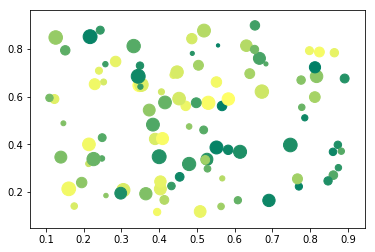

In [8]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100),
            c=np.random.random(100), cmap='summer')
pass

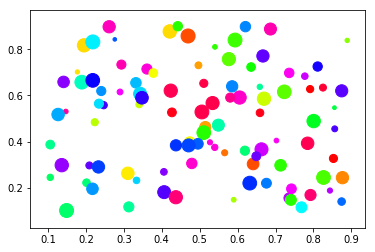

In [9]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100),
            c=np.random.random(100), cmap='hsv')
pass

In [10]:
# find the bottom, middle and top colors of the winter colormap
colors = plt.cm.winter(np.linspace(0, 1, 3))
colors

array([[ 0.        ,  0.        ,  1.        ,  1.        ],
       [ 0.        ,  0.50196078,  0.74901961,  1.        ],
       [ 0.        ,  1.        ,  0.5       ,  1.        ]])

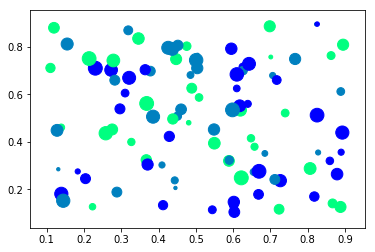

In [11]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100),
            c=colors)
pass

### Styles

In [12]:
plt.style.available

['bmh',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn-whitegrid',
 'grayscale',
 'seaborn-paper',
 'dark_background',
 'seaborn-poster',
 'seaborn-colorblind',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-deep',
 'seaborn-darkgrid',
 '_classic_test',
 'classic',
 'ggplot',
 'seaborn',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-muted',
 'seaborn-bright']

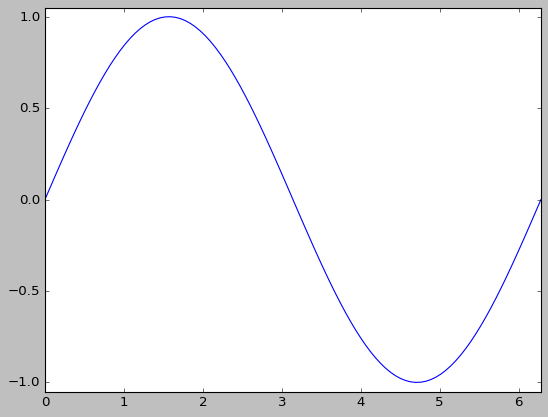

In [13]:
with plt.style.context('classic'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

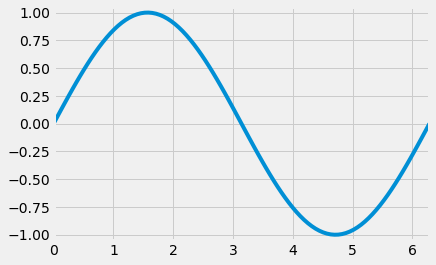

In [14]:
with plt.style.context('fivethirtyeight'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

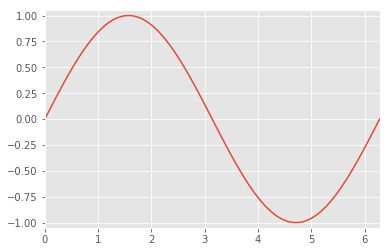

In [15]:
with plt.style.context('ggplot'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

/home/leetz/miniconda3/envs/beakerx/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


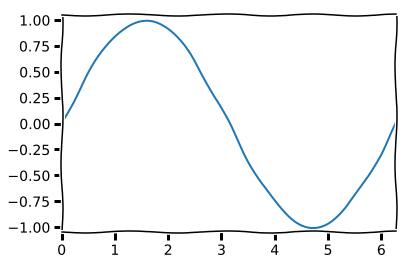

In [16]:
with plt.xkcd():
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Customize your plot

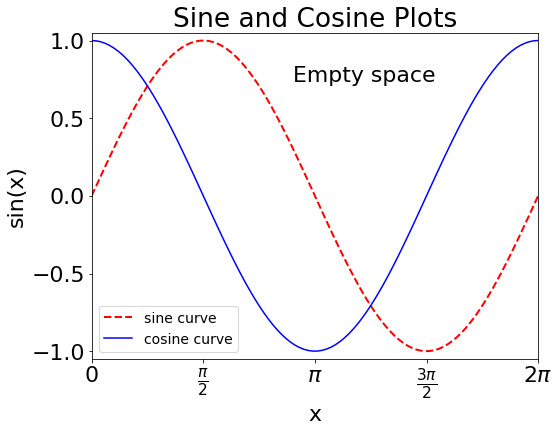

In [17]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
plt.plot(x, y, color='red', linewidth=2, linestyle='dashed', label='sine curve')
plt.plot(x, np.cos(x), 'b-', label='cosine curve')
plt.legend(loc='best', fontsize=14)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks([0,0.5*np.pi,np.pi,1.5*np.pi,2*np.pi],
           [0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.title('Sine and Cosine Plots')
plt.text(0.45, 0.9, 'Empty space', transform=ax.transAxes, ha='left', va='top')
pass

### Plot layouts

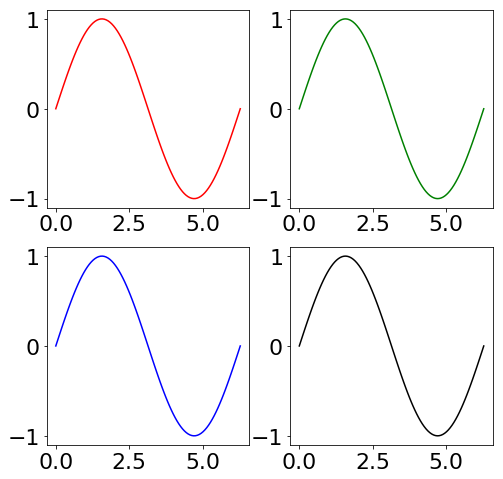

In [18]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0].plot(x,y, 'r')
axes[0,1].plot(x,y, 'g')
axes[1,0].plot(x,y, 'b')
axes[1,1].plot(x,y, 'k')
for ax in axes.ravel():
    ax.margins(0.05)
pass

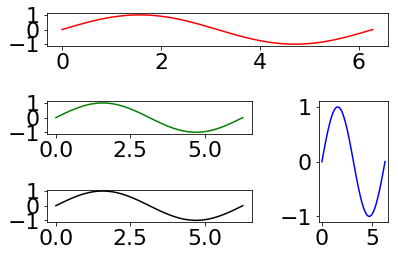

In [19]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0), colspan=2)
axes = [ax1, ax2, ax3, ax4]
colors = ['r', 'g', 'b', 'k']
for ax, c in zip(axes, colors):
    ax.plot(x, y, c)
    ax.margins(0.05)
plt.tight_layout()

## Seaborn

In [20]:
import seaborn as sns
import numpy.random as rng
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

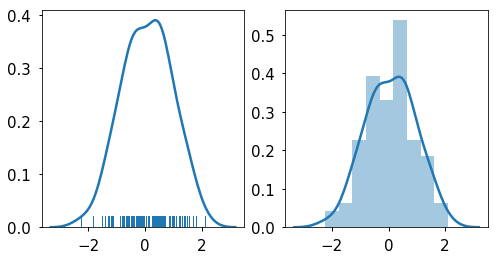

In [21]:
# density plot
xs = rng.normal(0,1,100)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

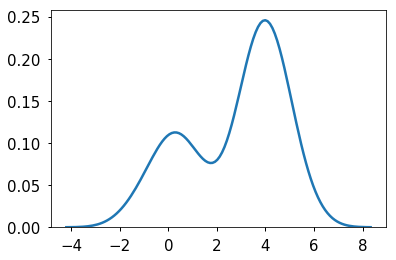

In [22]:
# kernel density estimate
sns.kdeplot(np.r_[rng.normal(0,1,50), rng.normal(4,0.8,100)])
pass

In [23]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


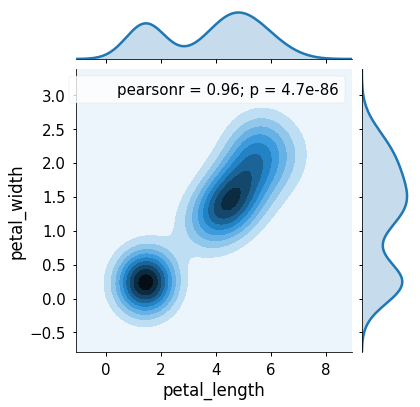

In [24]:
# joint distribution
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='kdeplot')
pass

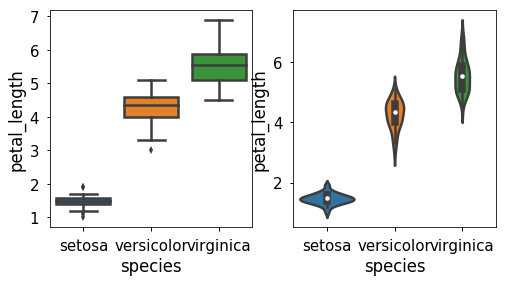

In [25]:
# box & voilin plot
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.boxplot(x='species', y='petal_length', data=iris, ax=axes[0])
sns.violinplot(x='species', y='petal_length', data=iris, ax=axes[1])
pass

In [26]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


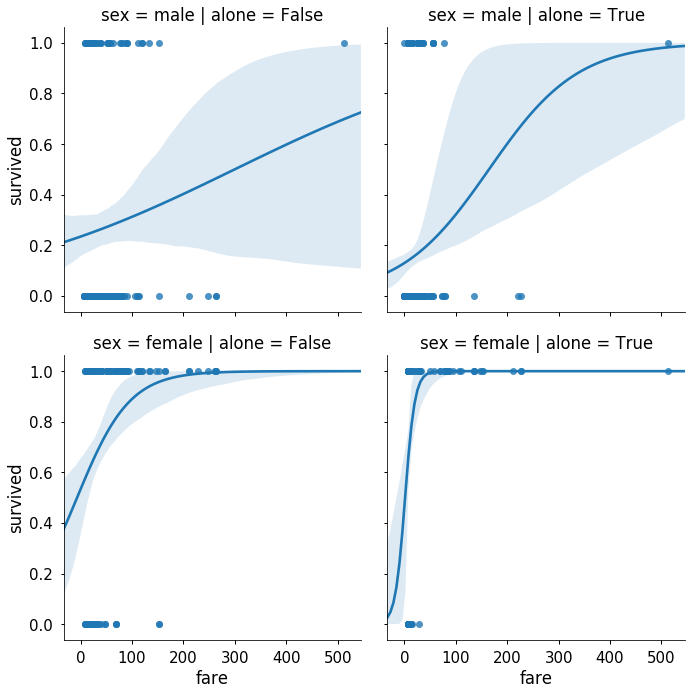

In [27]:
sns.set_context('notebook', font_scale=1.5)
sns.lmplot(x='fare', y='survived', col='alone', row='sex', data=titanic, logistic=True)
pass

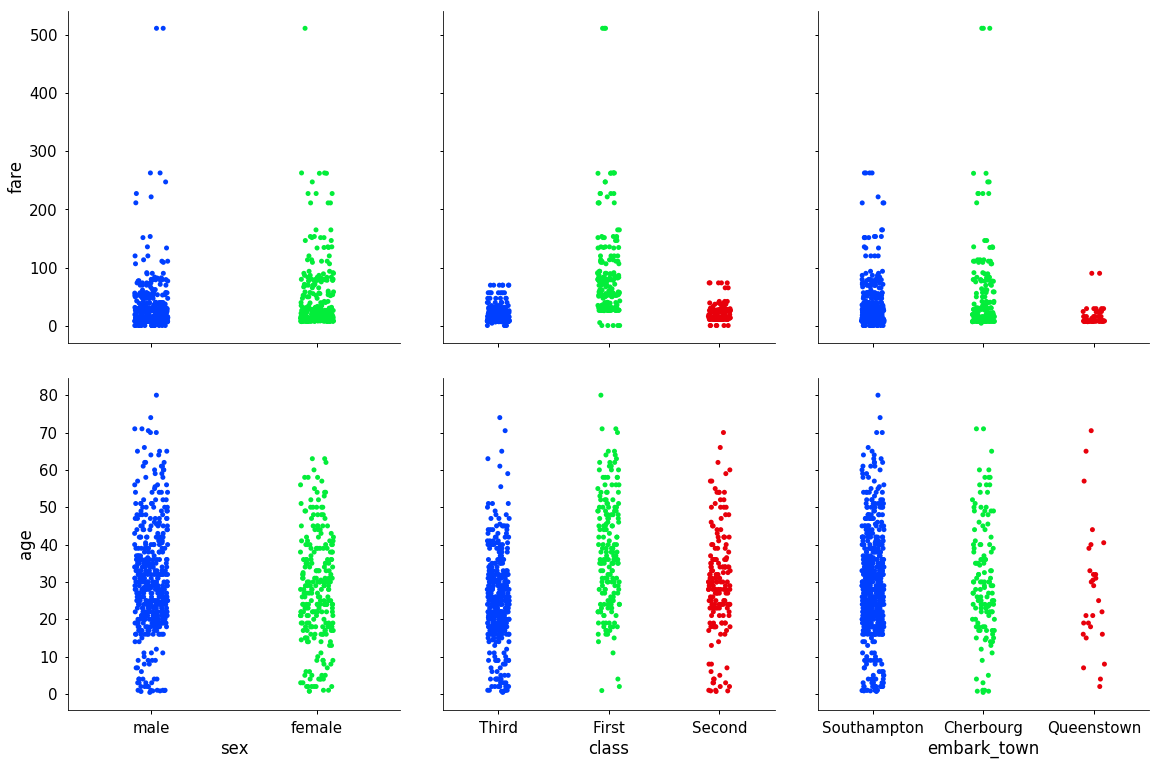

In [28]:
g = sns.PairGrid(titanic,
                 y_vars=['fare', 'age'],
                 x_vars=['sex', 'class', 'embark_town' ],
                 aspect=1, size=5.5)
g.map(sns.stripplot, jitter=True, palette="bright")
pass